# Introduction to Python Programming
## Matplotlib

**`matplotlib`** is the go-to plotting library for Python<br><br>
**Pros:**
* Huge amount of functionality/options
* Works with numpy arrays and python lists
* Comes with many prepackaged Python distros (anaconda, WinPython, etc.)
* Easily saves plots to image (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats
* Has an excellent set of examples (with code) at http://matplotlib.org/gallery
<br>

**Cons:**
* Slow for rapidly changing plots
* 3D plotting support is not great

In [1]:
# Create plots inline within this line in an iPython notebook
%matplotlib inline 

# Import numpy and pyplot (pyplot is preferred over pylab)
import matplotlib.pyplot as plt
import numpy as np

### Example 1. Simple plot

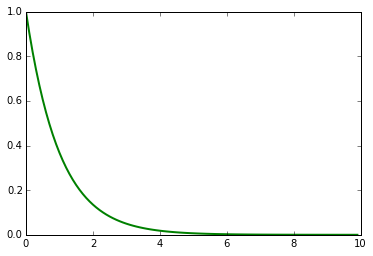

In [2]:
# Make sample data
x = np.arange(0, 10, 0.1)
y = np.exp(-1. * x)

# Call plotting function and then display results
plt.plot(x, y, color='g', linewidth=2)
plt.show()

# If you wanted to save, uncomment the last line.
# All major image formats (as well as PDFs) are accepted formats.
# plt.save('file/path/figure1.png')

### Example 2. Using `plt.subplots()` 

**`plt.subplots()`** is the recommended plotting scheme. It facilitates much of matplotib's functionality by giving you back the **`figure`** and **`axes`** objects. For a quick graphic to keep these terms straight, see
[Parts of a figure](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)


axes type: <type 'numpy.ndarray'>
axes object:


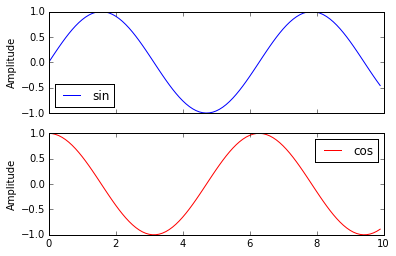

In [3]:
t = np.arange(0, 10, 0.1)

# Create figure and axes objects. Make them share the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

# Here, `axes` is a numpy array with two axes subplot objects
print 'axes type: ' + str(type(axes))
print 'axes object:\n' + str(axes)

# Plot on each subplot by indexing into 'ax'
axes[0].plot(t, np.sin(t), label='sin')
axes[1].plot(t, np.cos(t), label='cos', c='red')

# We can loop over the `axes` array to set properties in every subplot (no matter how many)
for ax in axes:
    ax.legend(loc='best')
    ax.set_ylabel('Amplitude')

# Display result
plt.show()

### Exercises:
1. Remake the above plot with 4 subplots (2 rows, 2 columns; hint: you'll now have to index into axes like **`axes[0, 0]`**).
2. Create a loop over all the axes objects (hint: use **`axes.flatten()`**) so that the **`legend`** and **`set_ylabel`** functions are called for all subplots.
3. Use the loop from #2 to add a title to only the top row of plots using the **`set_title`** function.


In [ ]:
# Exercises Workspace


### Example 3. Plotting histograms 

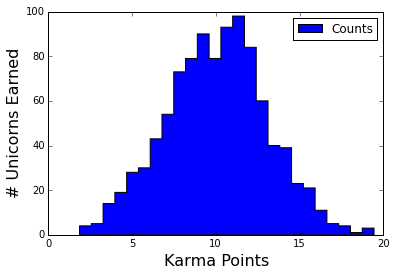

In [6]:
# Create gaussian distributed data with mu=10, sigma=3
x = 10 + 3 * np.random.randn(1000)

# Create figure and axes object
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Create histogram
nbins=25
ax.hist(x, bins=nbins, histtype='stepfilled', label='Counts')

# Set other properties
ax.set_ylabel('# Unicorns Earned', fontsize=16)
ax.set_xlabel('Karma Points', fontsize=16)
ax.legend(loc='upper right')

# Display result
plt.show()

### Example 4. Plotting color images with `imshow`


<matplotlib.colorbar.Colorbar instance at 0x108f3acf8>

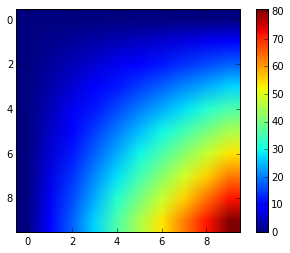

In [7]:
# Create some data
x = np.arange(10)
y = np.arange(10)
z = x * y[:,np.newaxis]

# Create figure and axes object
fig, ax = plt.subplots()

# Plot colormap and add colorbar scale
img = ax.imshow(z) 
plt.colorbar(img)

# Often used params for `imshow`: 
# cmap (try 'hot', 'cool') 
# interpolation (try 'nearest')
# origin (try 'lower')

### Example 5. Error bars


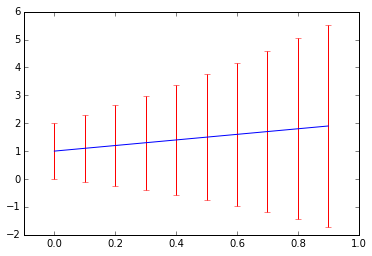

In [8]:
# Create some data
x = np.arange(0., 1., 0.1)
y = x + 1
y_error = y ** 2

# Create figure and axes object
fig, ax = plt.subplots()

# Create errorbar plot using `y_error` and color errorbars red
ax.errorbar(x, y, yerr=y_error, ecolor='red')
ax.set_xlim([-.1, 1.])
plt.show()

### Example 5. Gridspec

Gridspec is useful when you have uneven subplots. It can get tricky for more complex plots, so first try to use **`ax.subplots()`** (like in the previous examples) if possible.

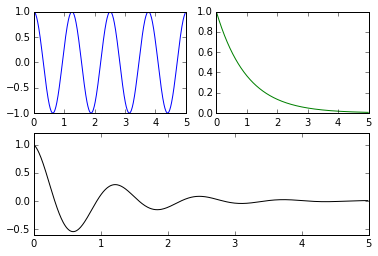

In [9]:
import matplotlib.gridspec as gridspec

t = np.arange(0., 5., 0.01)

# Create grispec object and define each subplot
gs = gridspec.GridSpec(2, 2)
ax0 = plt.subplot(gs[0, 0]) # Top left corner
ax1 = plt.subplot(gs[0, 1]) # Top right corner
ax2 = plt.subplot(gs[1, :]) # Bottom, span entire width

ax0.plot(t, np.cos(5 * t), c='b')
ax1.plot(t, np.exp(-1 * t), c='g')
ax2.plot(t, np.cos(5 * t) * np.exp(-1 * t), c='k')

plt.show()

### Example 6. Interactive plotting with **`plt.ion()`**

Normally when you create a plot and actually render it with **`plt.show()`**, the Python interpreter will not accept input until you close the plot window. You also will not be able to make any changes to the plot without rerunning your code. If you just ran a 2 hour analysis script and realized you have a typo in your plot title, this is aggravating as you'll have to rerun the entire script.

One solution is to use interactive plotting. This releases the python interpreter and allows you to make changes to the plot on the fly. To take advantage of this, enter the necessary changes in your interpreter and call **`plot.draw()`** to redraw the figure.

You'll need to copy the code to a script or your interpreter to fully run this example.  Starting ipython with the command **`ipython --pylab`** will use the pylab backend and sometimes fixes this problem.

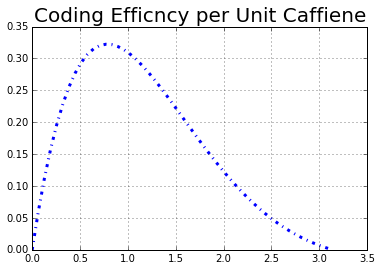

In [10]:
# Clear variables stored in notebooks
%reset -f
import numpy as np
import matplotlib.pyplot as plt

# Turn on interactive plotting. `ion` stands for "interactive on"
plt.ion()

# Create figure and axes object
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
x = np.linspace(0, np.pi)
y = np.sin(x) * np.exp(-1. * x)

ax.plot(x, y, linestyle='-.', lw=3)
ax.grid(True)
ax.set_title('Coding Efficncy per Unit Caffiene', fontsize=20)

plt.show()

#
# Realization that you have a typo after runnning a 2-hour analysis script happens here
#

# Take advantage of interactive plotting by uncommenting the below code in an interpreter.
#ax.set_title('Coding Efficiency per Unit Caffeine', fontsize=20)
#plt.draw()  # Update figure